<a href="https://colab.research.google.com/github/lewisjustin749/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This jupyter notebook is prepared by “Justin Lewis”.

# 1. Load Data and perform general EDA 
<ol type="I">
<li>import libraries necessary libraries and perform necessariy nltk download operations</li>
<li>As part of understanding how the columns are separated, read the file using the open function and create a list and show the first 10 items in the list</li>
<li>Based on your observation on how the data are separated, load the data set into pandas data frame and show the first 5 and last 5 rows</li>
<li>See whether there are any null values and remove all the rows with any null values, and then show again that there are no more null values</li>


<li>Generate a counterplot to show the number of news in each subject</li>
<li> Generate a counterplot to show the number of news in each category (fake/ True)</li>
<li>Generate two word clouds, one for fake news and one for true news, and observe the most frequent words in each category and just write your observation on them.</li>
<li>Create a column "AllText" that has the concatenated subject, title, and text [For example, for each news we have the subject, title, and text. We want a column that has all of this together as a large string]  [See the example answer with the majority vote in this link: https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-pandas-datafra (Links to an external site.) )</li>
</li>
<li>Using the dataframe's copy function, save the data frame into another dataframe so that you can use it later</li>
<li>Drop the title, text, subject, and date columns from the data frame as we will not use them separately. We have all the text in a single column that you have generated above</li>
<li>Calculate the length of each text (I mean AllText column) and put them in a length column</li>

<li>Plot two histograms to see the distribution of the lengths. One for fake news and one for true news. Write in words about the plots</li>

<li>Write in Words: What is TFIDF? How to create bag of words using sklearn? And how to generate TFIDF for the bag of words?</li>


In [4]:
#=======================================================================================
# Importing the libaries:
#=======================================================================================
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
%matplotlib inline

Saving news.csv to news (1).csv


In [5]:
# reading each line from news csv 
messages = [line.rstrip() for line in open('news.csv')]

In [6]:
# Print first 10 lines of csv file
for message in messages[:10]:
    print(message)
    print('\n')

title	text	subject	date	target


As U.S. budget fight looms, Republicans flip their fiscal script	WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also wan

In [7]:
# Convert news csv into a dataframe 
# Print first 5 values in df
data = pd.read_csv('news.csv', sep = '\t', )
data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
data.tail()

,title,text,subject,date,target
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [9]:
# Null value analysis
missingvalues = data.isnull().sum()
missingvalues.sort_values(inplace = True, ascending = False)
missingvalues


title      0
text       0
subject    0
date       0
target     0
dtype: int64

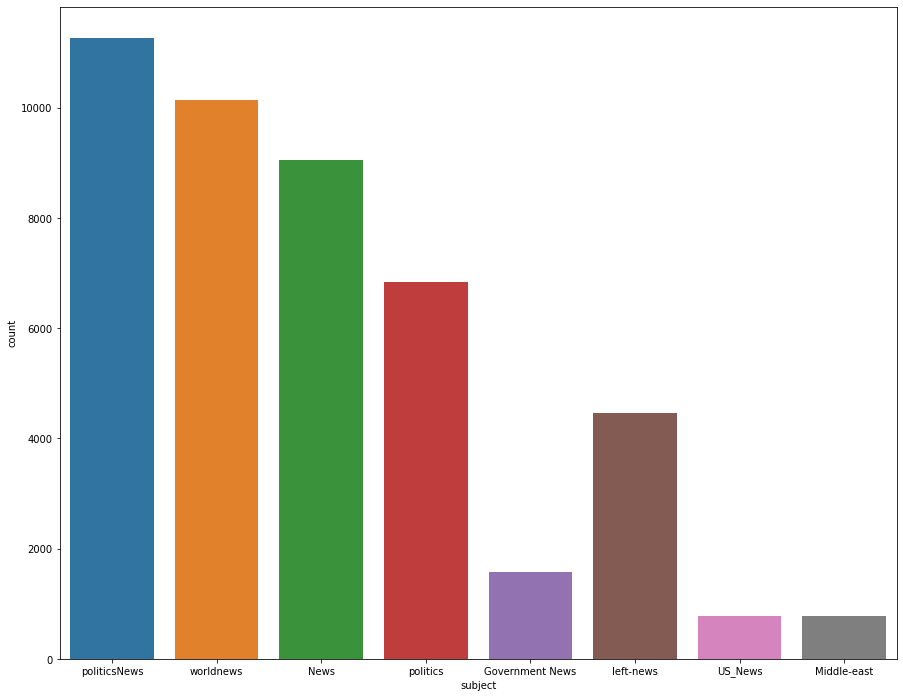

In [10]:
# Countplot of news subject
plt.figure(figsize = (15,12))
ax = sns.countplot(x="subject", data=data);

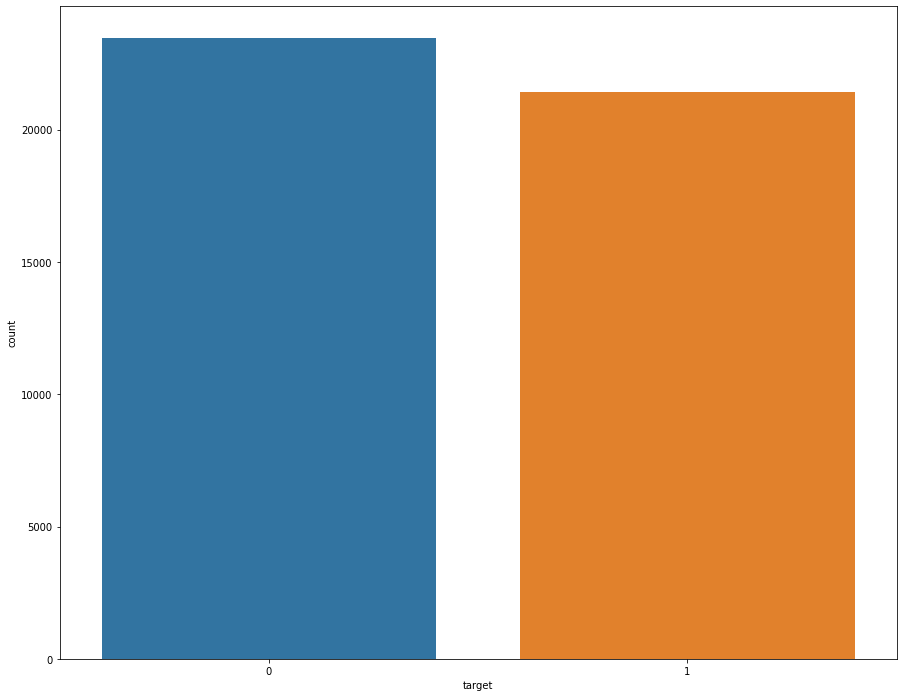

In [11]:
# Countplot of fake or true news
plt.figure(figsize = (15,12))
ax = sns.countplot(x="target", data=data);

Insights:



*   The negative class is fake news so there are slightly more fake news articles compared to true news.




In [12]:
from wordcloud import WordCloud

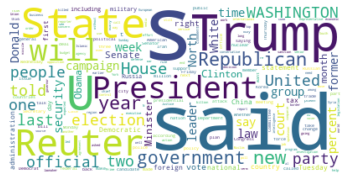

In [13]:
# Some exploratory data analysys
# create big text to generate wordcloud of true news
true_news = " ".join(cat for cat in data[data['target'] == 1 ]['text'])
true_news_word_cloud = WordCloud(collocations = False, background_color = 'white').generate(true_news)
plt.imshow(true_news_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

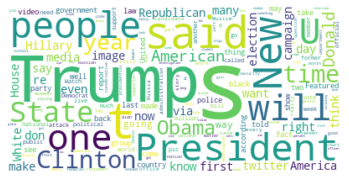

In [14]:
#create big text to generate wordcloud of fake news
fake_news = " ".join(cat for cat in data[data['target'] == 0 ]['text'])
fake_news_word_cloud = WordCloud(collocations = False, background_color = 'white').generate(fake_news)
plt.imshow(fake_news_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## write your observation on them.

Based on the two word clouds, I noticed that the common word that distinguishes whether the news is true news rather than fake news is the word reuter. The word reuter appeared many times after generating the word cloud for true news.



*   So fake news articles are missing the word Reuter




In [15]:
cols = ['title', 'text', 'subject', 'date', 'target']
data['AllText'] = data[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [16]:
## #copy DF into copy. Using copy for now on
dfcopy = data.copy()

In [17]:
# drop unnecessary columns 
dfcopy.drop(['title', 'text', 'subject', 'date'], inplace=True, axis=1)

In [18]:
# check length of each article in df
dfcopy['length'] = dfcopy['AllText'].apply(len)
dfcopy.head()

,target,AllText,length
0,1,"As U.S. budget fight looms, Republicans flip t...",4758
1,1,U.S. military to accept transgender recruits o...,4176
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,2884
3,1,FBI Russia probe helped by Australian diplomat...,2555
4,1,Trump wants Postal Service to charge 'much mor...,5308


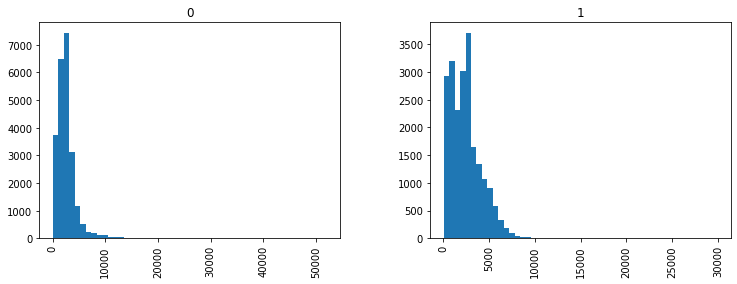

In [19]:
#Let's see the lenght of fake and true news
dfcopy.hist(column='length', by='target', bins=50,figsize=(12,4));

### Write in words about the plots

I noticed that in both histograms for both fake and true news that most of the articles have lengths of around 3000 - 5000. Bothe histograms are havily skewed right.

### Write in Words: What is TFIDF? How to create bag of words using sklearn? And how to generate TFIDF for the bag of words?

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set). Using sklearn you can create a bag of words using CountVectorizer() method. Tf-idf values can be computed using the TfidfVectorizer() method.

# 2. Train Test Split
<ol type="I">
<li>Import related libraries and perform train test split. Keep 20% data in the test set</li>
<li>Using a count plot show how many real and fake news do we have in the training set and how many in the test set</li>


In [20]:
X_train, X_test, y_train, y_test = train_test_split(dfcopy['AllText'], dfcopy['target'], test_size=0.2, random_state = 101)

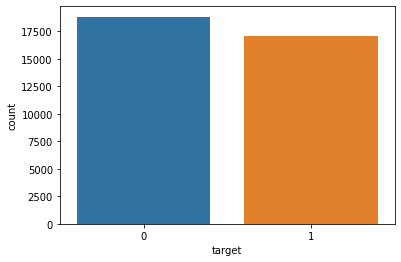

In [21]:
ax = sns.countplot(x=y_train, data=dfcopy);


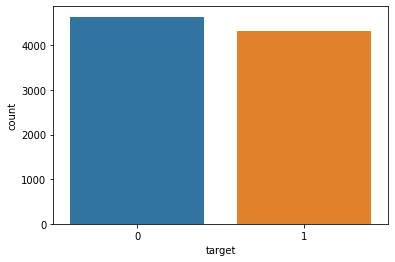

In [22]:
ax = sns.countplot(x=y_test, data=dfcopy);

# 3. Training and Testing Fake news classifier using MultinomialNB
<ol type="I">
<li>Create a pipeline that will use countVectorizer with the function you have created earlier for data preprocessing, then use Tftransformer and then use the NaiveBayes classifier</li>
<li>Fit the pipeline and then perform prediction</li>
<li>Generate classification report and confusion matrix (you have to achieve at least 96% accuracy for the test set to receive full credit)</li>
<li>Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news.</li>
<li>Copy a part of any news of your choice from a news website and then use the model to predict whether is it true or not. 
</li>

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
from sklearn.feature_extraction.text import CountVectorizer 

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

In [26]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [27]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [28]:
predictions = pipeline.predict(X_test)

In [30]:
accuracy_score(y_test,predictions)

0.9479955456570156

In [31]:
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4768
           1       0.93      0.96      0.95      4212

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[4473,  172],
       [ 295, 4040]])

### Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news.

To verify performance, the model can predict fake news with 96% accuracy, and the articles predicted as true news are 96% accurate based  on the recall score of 0.96. Overall the model is really good since it has a weighted and unweighted avg precision and recall of 0.95. 

*   In terms of misclassififed samples, there are more FN and articles are classified as fake news and are not actually fake articles.






In [54]:
#Testing with a website
#true news
newSMS = "UK Government Expected to Agree Deal With Roman Abramovich Over £1.5 Billion Chelsea Debt The UK Government are expected to agree a deal with Roman Abramovich over Chelsea's £1.5 billion debt, according to reports. A sale of the west London side is set to be completed in the next few weeks, with the reigning World and European Champions being put up for sale at the beginning of March. Raine Group, who are overseeing the sale, have made a shortlist of three bidders who are through to the next stages of the process."
#fake news
new = "CNN — Scientists in China have engineered monkeys to have a human autism gene in the hope that they can find a treatment for the condition, according to the scientific journal, Nature. A team of researchers at the Institute of Neuroscience in Shanghai created the special test-tube monkeys by giving them copies of the MECP2 gene thought to be linked to autism in humans. They say the macaques, the second generation to have the gene, showed asocial behavior at 11 months. “This work demonstrated the feasibility and reliability of using genetically engineered non-human primates to study brain disorders,” a statement from the institute read. According to Nature, autism has a vast array of symptoms and types and researchers think that at least 100 genes play a part. Until now animal studies of autism have relied on lab mice – far removed from humans in terms of genes and behaviorAlysson Muotri, who researches stem cells, autism and Rett’s syndrome at the University of California, San Diego told Nature that the macaques are “superior” to existing mouse models because monkeys more clearly show autism-like behavior. However, he urged caution: “It remains to be seen if the model can actually generate novel insights into the human condition,” he says Dogs and micro-pigs China has been at the forefront of research into genetically engineered animals. Last year, scientists in China said they had created dogs twice as strong as they would be naturally and the animals could help fight or prevent Parkinson’s disease.The Beijing Genomic Institute BGI, caused controversy in 2015 when they genetically engineered “micro-pigs” to sell as pets.But scientists warn that while advancements in genetic engineering are creating a wealth of new opportunities in medical science, it raises difficult ethical dilemmas.Penny Hawkins, head of Research Animals Department at the Royal Society for the Prevention of Cruelty to Animals, told CNN last year:“The creation of genetically engineered animals caninvolve painful, invasive procedures on animals; including the removal of eggs and hormone treatment.“Genetic alteration is never predictable and can result in oversized embryos, resulting in painful births. It can leave the animals severely affected in a way which is impractical for life. The process also very wasteful.”"
print(f'result: {pipeline.predict([newSMS])}')
print(f'result: {pipeline.predict([new])}')

result: [1]
result: [0]


In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
pipelineDL = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,4), random_state=0, early_stopping=True, verbose=2)),  # train on TF-IDF vectors w/ MLPClassifier classifier with two hidden layers
])

In [36]:
pipelineDL.fit(X_train,y_train)

Iteration 1, loss = 0.29177082
Validation score: 0.984967
Iteration 2, loss = 0.03206781
Validation score: 0.993318
Iteration 3, loss = 0.00937483
Validation score: 0.994432
Iteration 4, loss = 0.00471071
Validation score: 0.994710
Iteration 5, loss = 0.00313931
Validation score: 0.995267
Iteration 6, loss = 0.00244616
Validation score: 0.995546
Iteration 7, loss = 0.00207369
Validation score: 0.995546
Iteration 8, loss = 0.00183365
Validation score: 0.995546
Iteration 9, loss = 0.00166088
Validation score: 0.995546
Iteration 10, loss = 0.00152699
Validation score: 0.995546
Iteration 11, loss = 0.00141675
Validation score: 0.995546
Iteration 12, loss = 0.00132374
Validation score: 0.995546
Iteration 13, loss = 0.00124153
Validation score: 0.995546
Iteration 14, loss = 0.00116885
Validation score: 0.995824
Iteration 15, loss = 0.00110210
Validation score: 0.995546
Iteration 16, loss = 0.00104089
Validation score: 0.995824
Iteration 17, loss = 0.00098448
Validation score: 0.995824
Iterat

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 4),
                               random_state=0, verbose=2))])

In [37]:
predictionsDL = pipelineDL.predict(X_test)

In [38]:
print(classification_report(predictionsDL,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4647
           1       1.00      1.00      1.00      4333

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [39]:
confusion_matrix(y_test, predictionsDL)

array([[4630,   15],
       [  17, 4318]])

### Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news.

This model is a really good predictor of fake or true news since the precision and recall across the report is 100% accurate. 

In [53]:
# Testing with a website
newSMSDL = "UK Government Expected to Agree Deal With Roman Abramovich Over £1.5 Billion Chelsea Debt The UK Government are expected to agree a deal with Roman Abramovich over Chelsea's £1.5 billion debt, according to reports. A sale of the west London side is set to be completed in the next few weeks, with the reigning World and European Champions being put up for sale at the beginning of March. Raine Group, who are overseeing the sale, have made a shortlist of three bidders who are through to the next stages of the process."
new = "HRC lists Trump's persistent attacks against the LGBTQ community after the RNC claims he's taken unprecedented steps in support of the community.HRC President Alphonso David: “The RNC is hallucinating and advancing misleading and  disingenuous rhetoric. Yes, Trump has taken many ‘unprecedented’ steps, but those steps have been to undermine and eliminate rights protecting LGBTQ people, not empower us. Appointing a small handful of gay people out of thousands of nominations and making a very few -- and unfullfilled -- pledges can hardly qualify as accomplishments.  Don’t gaslight us.  The Trump-Pence administration is the most virulently anti-LGBTQ administration in decades -- the RNC cannot put lipstick on a pig.”Here’s a list of attacks the Trump-Pence administration has levied against LGBTQ people:For the full list of Trump’s attacks on LGBTQ people, visit HRC.org/Trump.Opposition to the Equality Act: Despite support from almost every segment of the U.S. population and a majority ofRepublicans, President Trump opposed the Equality Act. In May, the House passed the Equality Act, voting to guarantee critical non-discrimination protections for LGBTQ people among other crucial rights.Appointed anti-LGBTQ judges: Trump has appointed anti-LGBTQ judges with alarming anti-LGBTQ records to appointments at every level of the judicial system, including anti-equality Supreme Court Justices Gorsuch and Kavanaugh and federal nominees Kacsmaryk, Mateer, Bounds, Vitter. Menashi and others.Joked about Pence’s desire to hang LGBTQ people: In 2017, Trump joked about Vice President Pence’s anti-gay agenda saying “Don’t ask that guy—he wants to hang them all!” In the Workplace Supported employment discrimination against LGBTQ people: The Trump administration submitted amicus briefs to the U.S. Supreme Court supporting discrimination against LGBTQ people.Banned transgender service members from the military: Against the expert advice of military leadership, medical authorities, budget analysts, 70% of Americans and the armed forces of allied countries, Trump and Pence banned transgender people from serving in the military.Rolled back Obama-era non-discrimination protections: Trump’s Department of Justice upended previous DOJ interpretations of the Civil Rights Act that protect transgender and non-binary workers from employment discrimination and ceased enforcing non-discrimination protections as well as taking a hostile stance to LGBTQ workers in court.Issued rule to license discrimination: Trump’s Department of Labor issued a regulation designed to allow federal contractors to claim a religious exemption to fire LGBTQ workers because of their sexual orientation or gender identity.Kicked people living with HIV out of the military because of their status: The Department of Defense instituted a “Deploy or Get Out” policy, which would remove military personnel living with HIV from service solely because of their status.Created a hostile work environment for LGBTQ federal employees: According to Politico: “[The Trump administration] fostered a climate where six staffers who are LGBT described removing their wedding rings before coming to work in the morning, taking down photos of their partners and families or ultimately finding new jobs further away from certain political appointees. They did not want to be identified; two said they feared being reassigned for being gay.”In Health CareUndermine Section 1557 Rule: HHS published a proposed major change to the administrative rule interpreting Section 1557 of the Affordable Care Act (ACA) to remove explicit protections for LGBTQ people in healthcare programs and activities by excluding LGBTQ people from protections from discrimination based on sex stereotyping and gender identity.Advocated for the elimination of the entire Affordable Care Act: The Justice Department issued a legal filing arguing that the entirety of the Affordable Care Act should be overturned. This move would jeopardize health care for over 130 million people with preexisting conditions like HIV and eliminate non-discrimination protections for LGBTQ people.Created a Religious Discrimination Division: HHS created a new office whose sole purpose would be to defend physicians and other medical professionals who decide to refuse care, including to LGBTQ patients.Proposed cutting over $1.35 billion from PEPFAR budget: In his proposed FY 2019 budget, Trump cut $1.35 billion from, or 29% of PEPFAR’s budget. PEPFAR is the U.S. government program that fights AIDS abroad.In SchoolsGuidance for Schools on Transgender Students: The Departments of Education and Justice eliminated Obama-era guidance clarifying that schools must treat transgender students consistent with their gender identity. This encourages schools officials to permit harassment of transgender students, deny access to facilities consistent with gender identity, and refuse to use correct names and pronouns -- all inflicting untold emotional harm.Rejected Complaints From Transgender Students: The Department of Education refused to respond to civil complaints filed by transgender students, including those who were barred from using bathrooms that correspond with their gender identity. This increases the burden for transgender students to combat these harmful policies.Suggested it is acceptable for schools to discriminate against LGBTQ students while accepting tax-payer funds: Secretary of Education Betsy DeVos has refused to rule out federal funding for schools that discriminate against LGBTQ students and has declined to state she would otherwise intervene should discrimination occur.Sexual Assault: DeVos rescinded Title IX rules related to schools’ obligations to address sexual harassment, including sexual violence. By eliminating the Obama-era rules, DeVos increased the standard of proof from “preponderance of the evidence” to “clear and convincing evidence” making it more difficult for survivors of sexual assault to obtain justice. LGBTQ people are disproportionately affected by sexual assault and harassment, and the stigma that many LGBTQ people face can make it more difficult for survivors to report.Eliminated language protecting LGBTQ children participating in the 4-H program: The Trump-Pence Administration ordered 4-H programs to remove a policy specifically welcoming LGBTQ children in the 4-H program, which led to the firing of an official who protested.Used Title IX to discriminate against trans students: the Department of Education claimed that school policies allowing trans youth to participate in sports consistent with their gender identity violated federal law and threatened to withhold funds.In HousingAllowed emergency shelters to deny access to transgender and gender nonconforming people: Despite the fact that LGBTQ people are significantly more likely to experience homelessness in their lives, HUD Secretary Ben Carson has proposed a rule to permit emergency shelters to deny access or otherwise discriminate against transgender and gender nonconforming peoplewho are homeless. HUD also canceled a scheduled survey on LGBTQ homelessness.Placed transgender incarcerated persons in the wrong prison: The Federal Bureau of Prisons (BOP) rolled back an Obama-era policy that housed transgender prisoners consistent with their gender identity. With transgender people experiencing sexual assault at higher rates than average, this decision only puts them at further risk of assault.In Families Allowed foster care programs to discriminate while accepting tax-payer funds: Trump-Pence White House has proposed a federal regulation that would strip away nondiscrimination requirements and permit all Department of Health and Human Services (HHS) grant recipients, notably adoption and foster care agencies, to discriminate against LGBTQ people, and in many circumstances religious minorities and women, and still receive federal funding.Refused visas to partners of diplomats: The State Department began refusing visas for same-sex partners of some diplomats and U.N. workers if they are not married.Changed rules to deny surrogate born children citizenship: The Trump Administration has interpreted  immigration rules specifically so the child of a same-sex couple born abroad via surrogate would be considered born out of wedlock and making it more difficult to obtain U.S. citizenship.In RepresentationErased transgender people: Trump’s HHS proposed a new definition that would narrowly define sex as either male or female, unchangeable, and determined by birth. According to the New York Times: “The new definition would essentially eradicate federal recognition of the estimated 1.4 million [transgender] Americans.” In addition, agency staff,  including those at the Centers for Disease Control, have been instructed to stop using the word transgender in official reports.Eliminated information on LGBTQ rights, mentions, and representation on government websites: Within hours of Trump’s swearing-in, pages on LGBTQ rights and recognition were removed from government websites, including the White House.Blocked questions regarding sexual orientation from consideration for the census: Trump and Pence have sought to block questions on sexual orientation from the census in order to erase LGBTQ people from official counts. This would, in turn, prevent the collection of crucial data that could help improve government programs and resources for LGBTQ people.Refused to recognize LGBTQ people in National AIDS day Address: Despite being the community most affected by the epidemic, Vice President Pence has consistently refused to acknowledge LGBTQ people in his addresses on National AIDS day.In the World:Refusing LGBTQ asylum seekers fleeing violence: Trump issued an executive order to create further obstacles for all people seeking to enter the U.S., preventing refugees from escaping some of the most anti-LGBTQ regimes in the world.Embassy Pride Flags: Pence defended the State Department directive to ban U.S. embassies across the world from flying the LGBTQ Pride Flag during Pride Month.Left the U.N. Human Rights Council: Trump and Pence, over LGBTQ and other issues, removed the United States from the U.N. Human Rights Council.Chechnya: Trump and Pence refused to condemn attacks on LGBTQ people in Chechnya, where atrocities against queer people are horrific and ongoing.Brunei: The Trump-Pence administration has refused to condemn a Brunei law that imposes barbaric punishments on LGBTQ people, including death by stoning, torture and whipping. "
print(f'result: {pipeline.predict([newSMSDL])}')
print(f'result: {pipeline.predict([new])}')

result: [1]
result: [0]


### Discuss any difference in performance between this model and NB model.

The main difference is that the Deep Neural Network is more accurate compared to the NB model because of the hidden layer interactions in the DNN model. 